<a href="https://www.kaggle.com/code/syokouhioku/hioku-kaggle-getting-started-with-titanic?scriptVersionId=190242203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

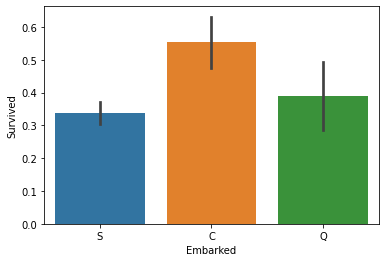

In [6]:
sns.barplot(data=train_data,x='Embarked',y='Survived')

In [7]:
s = train_data.groupby('Embarked')['Survived'].value_counts()
s

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [8]:
s2 = s/s.groupby(level=0).sum() 
display(s2)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

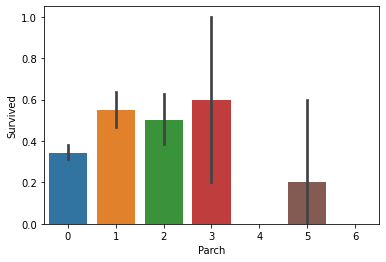

In [9]:
sns.barplot(data=train_data,x='Parch',y='Survived')

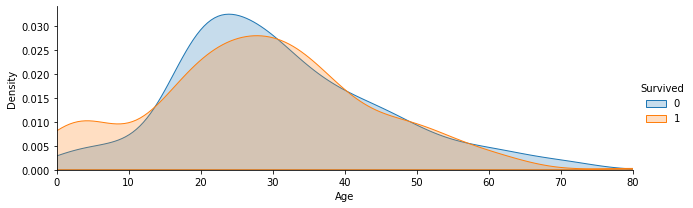

In [10]:
ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)
ageFacet.set(xlim=(0,train_data['Age'].max()))
ageFacet.add_legend()

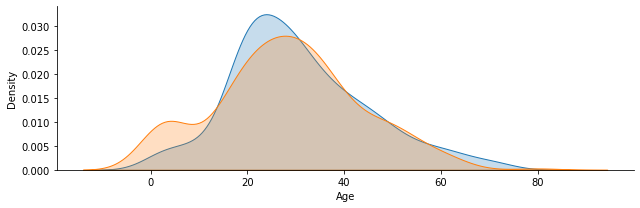

In [11]:
ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
y=train_data["Survived"]

features=["Pclass","Sex","SibSp","Parch","Age"]
X_train=pd.get_dummies(train_data[features])
X_test=pd.get_dummies(test_data[features])

In [14]:
X_train=X_train.fillna(25)


In [15]:
X_train

,Pclass,SibSp,Parch,Age,Sex_female,Sex_male
0,3,1,0,22.0,0,1
1,1,1,0,38.0,1,0
2,3,0,0,26.0,1,0
3,1,1,0,35.0,1,0
4,3,0,0,35.0,0,1
...,...,...,...,...,...,...
886,2,0,0,27.0,0,1
887,1,0,0,19.0,1,0
888,3,1,2,25.0,1,0
889,1,0,0,26.0,0,1


In [16]:
model=RandomForestClassifier(n_estimators=100,max_depth=7,random_state=3)

In [17]:
model.fit(X_train, y)

RandomForestClassifier(max_depth=7, random_state=3)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix_traindata=model.predict(X_train)
print(confusion_matrix(y,confusion_matrix_traindata))

[[511  38]
 [ 80 262]]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [21]:
accuracy = accuracy_score(y, confusion_matrix_traindata)
precision = precision_score(y, confusion_matrix_traindata, average='binary')
recall = recall_score(y, confusion_matrix_traindata, average='binary')
f1 = f1_score(y, confusion_matrix_traindata, average='binary')

# 打印结果
print('模型混淆矩阵为\n', confusion_matrix(y,confusion_matrix_traindata))
print(f'准确率 (Accuracy): {accuracy}')
print(f'精确率 (Precision): {precision}')
print(f'召回率 (Recall): {recall}')
print(f'F1 得分 (F1 Score): {f1}')

模型混淆矩阵为
 [[511  38]
 [ 80 262]]
准确率 (Accuracy): 0.867564534231201
精确率 (Precision): 0.8733333333333333
召回率 (Recall): 0.7660818713450293
F1 得分 (F1 Score): 0.8161993769470405


In [22]:
X_test=X_test.fillna(25)


In [23]:
predictions=model.predict(X_test)

In [24]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [25]:
output.to_csv('submission.csv', index=False)